### The goal of this exercise is to create very useful clusters without having labeled data 
#### (labeling data involves assigning categories to individual instances or rows, and the labeled categories are often stored in a specific column within the dataset)

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

import warnings
warnings.filterwarnings("ignore") 

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
number_variable=digits.data
target_variable=digits.target

In [4]:
#Shape of the dataset
number_variable.shape

(1797, 64)

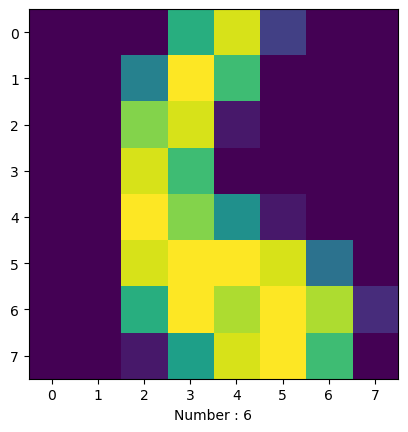

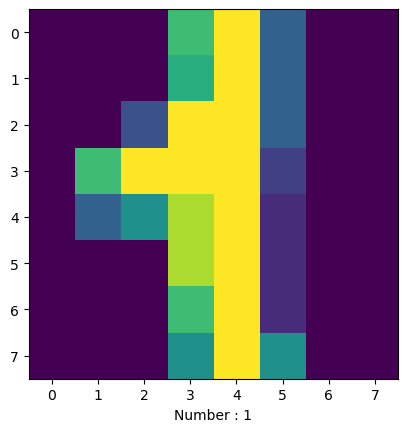

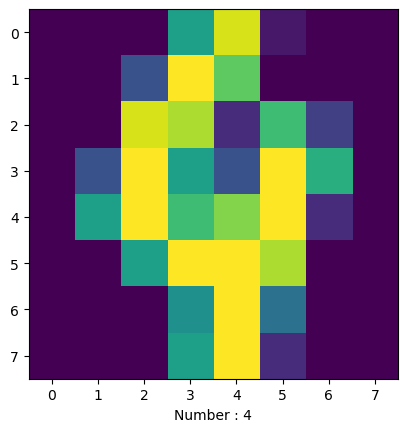

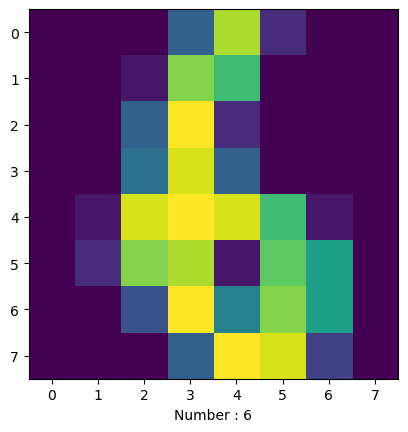

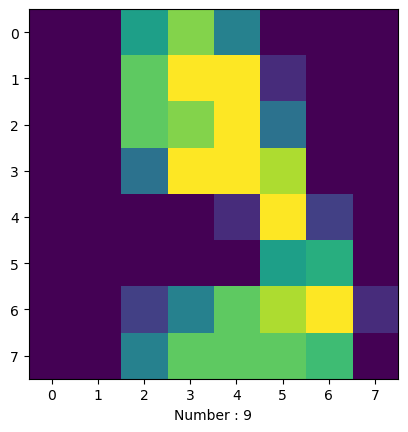

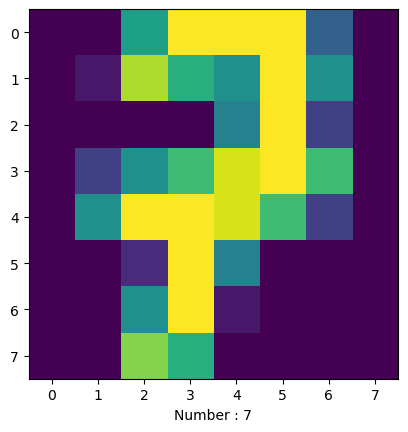

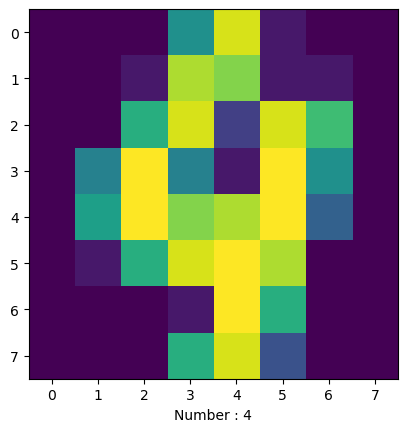

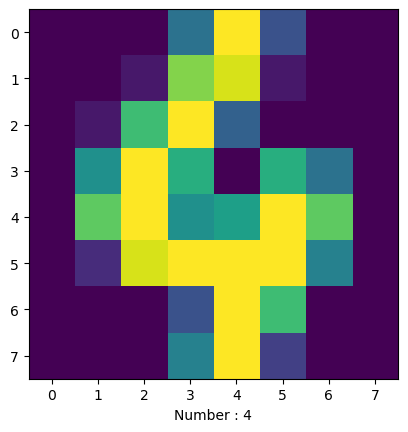

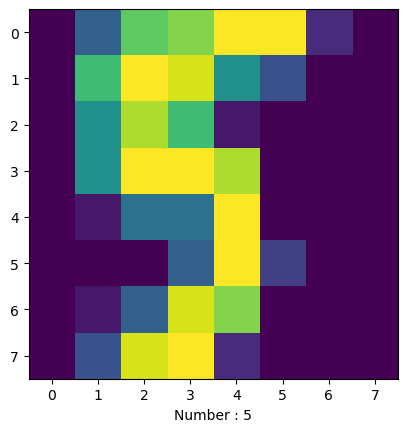

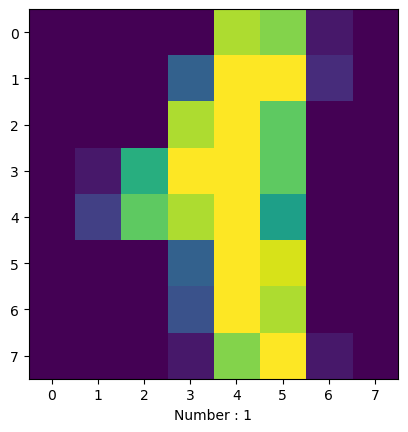

In [5]:
#Viewing 10 random number of the dataset ( imshow() Display data as an image, i.e., on a 2D regular raster)
import numpy as np
for i in np.random.randint(100, size=10):  #the number of random integers to generate, which is 10 in this case. 
    plt.imshow(number_variable[i].reshape(8,8))
    plt.xlabel("Number : {}".format(target_variable[i]))
    plt.show()

### We know that we should use 10 clusters because we have 10 numbers in our dataset

In [29]:
print(np.unique(target_variable)) # number of unique values inside the target
kmeans = KMeans(init='k-means++', n_clusters=10)
clusters = kmeans.fit_predict(number_variable)
print(clusters)

[0 1 2 3 4 5 6 7 8 9]
[9 2 2 ... 2 3 3]


#### k-means++ improves the initialization step by intelligently selecting initial cluster centers that are more likely to be distant from each other. This tends to result in better quality clusters and often leads to faster convergence of the KMeans algorithm

### Let's evaluate our model

In [8]:
# Accuracy problem
from sklearn.metrics import accuracy_score
print(accuracy_score(target_variable, clusters))

from sklearn.metrics import classification_report
print(classification_report(target_variable,clusters))

0.03060656649972176
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.01      0.01      0.01       182
           2       0.01      0.02      0.02       177
           3       0.01      0.01      0.01       183
           4       0.00      0.00      0.00       181
           5       0.17      0.23      0.20       182
           6       0.00      0.00      0.00       181
           7       0.00      0.00      0.00       179
           8       0.06      0.03      0.04       174
           9       0.00      0.01      0.00       180

    accuracy                           0.03      1797
   macro avg       0.03      0.03      0.03      1797
weighted avg       0.03      0.03      0.03      1797



#### This might suggest that the model is struggling to distinguish between different classes and is not performing well overall on this dataset of 1797 samples.

In [12]:
centroids=kmeans.cluster_centers_

#### Comparing centroids with labels

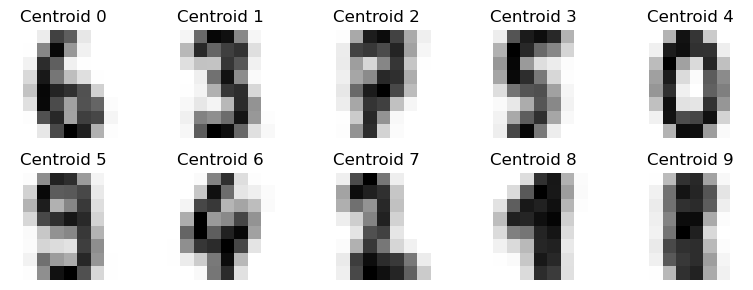

In [32]:
plt.figure(figsize=(8, 3))
for i in range(10):  # Assuming 10 clusters 
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids[i].reshape(8, 8), cmap='binary')
    plt.title(f'Centroid {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

#### It looks like the centroid does not match the label 

In [17]:
# Let's look at which clusters each of the numbers belong in 
clust = pd.DataFrame(target_variable[clusters==1])
clust.iloc[:,0].value_counts()

3    154
2     13
9      6
8      2
5      1
1      1
Name: 0, dtype: int64

### Assigning each observation to the real label it belongs

In [20]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(target_variable[mask])[0]

### Evaluating the model again

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, target_variable)


0.7918753478018921

### Visualising where the model made mistakes

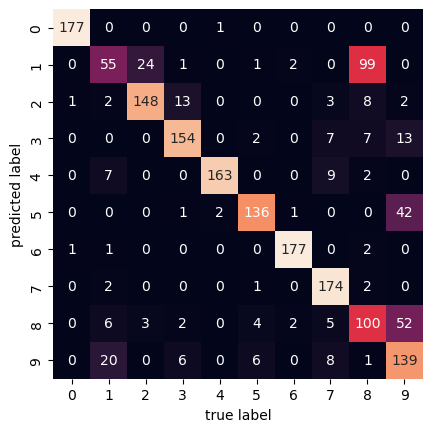

In [28]:
# Confusion matrix visualisation
data=digits.data
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target_variable, labels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');